In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(
    style='ticks',
    font_scale=1.5
)

(0, 1)

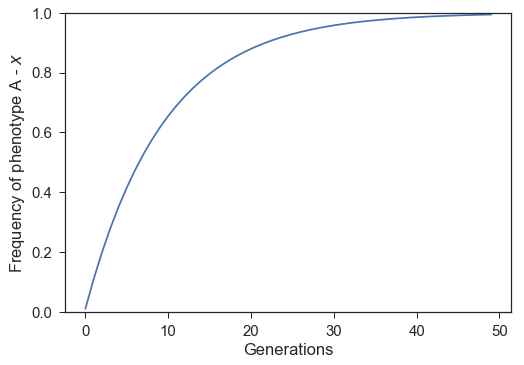

In [17]:
def x(t, x0, ρ):
    return 1 - (1-ρ)**t * (1-x0)

t = np.arange(0, 50)
ρ = 0.1
x0 = 0.01
plt.plot(t, x(t, x0, ρ))
plt.xlabel('Generations')
plt.ylabel('Frequency of phenotype A - $x$')
plt.ylim(0, 1)
# sns.despine()

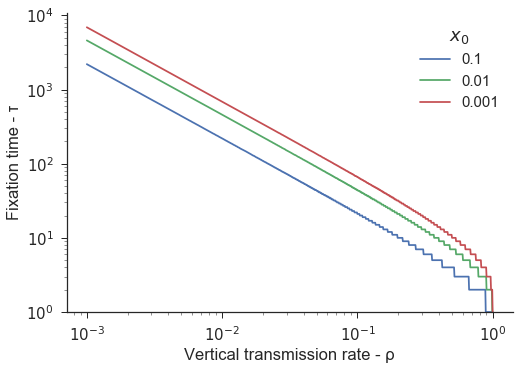

In [62]:
def τ(x0, ρ):
    return np.ceil(
        np.log(x0/(1-x0)) / np.log(1-ρ)
    )

ρ = np.logspace(-3, -0.0001, 1000)

x0 = 0.1
plt.plot(ρ, τ(x0, ρ), label=x0)
x0 = 0.01
plt.plot(ρ, τ(x0, ρ), label=x0)
x0 = 0.001
plt.plot(ρ, τ(x0, ρ), label=x0)

plt.xlabel('Vertical transmission rate - ρ')
plt.ylabel('Fixation time - τ')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1, None)
plt.legend(title='$x_0$')
sns.despine()